In [2]:
import pandas as pd
from data import load_database_train
from plotter import plot_all_readings
%matplotlib inline

# Dados de treino

In [3]:
database_train = load_database_train()
print(database_train.__dict__.keys())

dict_keys(['datalist', 'datadict', 'X', 'y'])


In [4]:
df = pd.DataFrame(data=database_train.datadict)
pd.set_option('display.max_rows', None)
df

,spell,author,device,date,acc_data,gyr_data,time
0,REVELIO,DIEGO,MOTO_G5S_PLUS,2020-07-27 21:20:12.268938,332,332,1603.393554
1,REVELIO,DIEGO,MOTO_G5S_PLUS,2020-07-27 21:19:19.170294,429,429,2073.272705
2,REVELIO,DIEGO,MOTO_G5S_PLUS,2020-07-27 21:17:48.953771,529,529,2557.678222
3,REVELIO,DIEGO,MOTO_G5S_PLUS,2020-07-27 21:20:15.756820,354,354,1709.960938
4,REVELIO,DIEGO,MOTO_G5S_PLUS,2020-07-27 21:18:50.968421,418,418,2019.989013
5,REVELIO,DIEGO,MOTO_G5S_PLUS,2020-07-27 21:20:31.476008,299,299,1443.542481
6,REVELIO,DIEGO,MOTO_G5S_PLUS,2020-07-27 21:19:59.688067,328,328,1584.014893
7,REVELIO,DIEGO,MOTO_G5S_PLUS,2020-07-27 21:20:27.940709,319,319,1540.435791
8,REVELIO,DIEGO,MOTO_G5S_PLUS,2020-07-27 21:19:49.033474,501,501,2422.058105
9,REVELIO,DIEGO,MOTO_G5S_PLUS,2020-07-27 21:19:08.272643,428,428,2068.420410


In [6]:
df.groupby(['author', 'spell']).size()

author     spell             
ANDERSON   ALOHOMORA             19
           ARRESTO_MOMENTUM      19
           FINITE_INCANTATEM     19
           INCENDIO              20
           REVELIO               20
           WINGARDIUM_LEVIOSA    20
DIEGO      ALOHOMORA             20
           ARRESTO_MOMENTUM      18
           FINITE_INCANTATEM     20
           INCENDIO              20
           REVELIO               20
           WINGARDIUM_LEVIOSA    20
GUILHERME  ALOHOMORA             20
           ARRESTO_MOMENTUM      20
           FINITE_INCANTATEM     20
           INCENDIO              20
           REVELIO               20
           WINGARDIUM_LEVIOSA    20
HEITOR     ALOHOMORA             20
           ARRESTO_MOMENTUM      20
           FINITE_INCANTATEM     20
           INCENDIO              20
           REVELIO               20
           WINGARDIUM_LEVIOSA    20
YURI       ALOHOMORA             20
           ARRESTO_MOMENTUM      20
           FINITE_INCANTATEM     2

In [7]:
df.sort_values('time')

,spell,author,device,date,acc_data,gyr_data,time
150,WINGARDIUM_LEVIOSA,ANDERSON,SAMSUNG_A5,2020-07-27 09:54:17.860105,207,207,1049.664489
347,ARRESTO_MOMENTUM,YURI,SAMSUNG_NOTE_10,2020-07-26 21:22:03.196856,553,553,1103.867750
146,WINGARDIUM_LEVIOSA,ANDERSON,SAMSUNG_A5,2020-07-27 09:55:10.368367,221,221,1119.231221
149,WINGARDIUM_LEVIOSA,ANDERSON,SAMSUNG_A5,2020-07-27 09:54:39.735411,223,223,1128.469319
153,WINGARDIUM_LEVIOSA,ANDERSON,SAMSUNG_A5,2020-07-27 09:55:06.125662,225,225,1134.372570
148,WINGARDIUM_LEVIOSA,ANDERSON,SAMSUNG_A5,2020-07-27 09:55:28.745188,227,227,1145.101746
139,WINGARDIUM_LEVIOSA,ANDERSON,SAMSUNG_A5,2020-07-27 09:55:47.158831,227,227,1154.956887
169,ALOHOMORA,ANDERSON,SAMSUNG_A5,2020-07-27 10:04:26.838803,231,231,1167.351746
156,WINGARDIUM_LEVIOSA,ANDERSON,SAMSUNG_A5,2020-07-27 09:54:34.167558,231,231,1170.515977
321,FINITE_INCANTATEM,YURI,SAMSUNG_NOTE_10,2020-07-26 21:24:13.399356,590,590,1177.856268


### Exemplo de dado com gráfico

In [ ]:
plot_all_readings(database_train.datalist[0].readings, table_format=(0, 2))

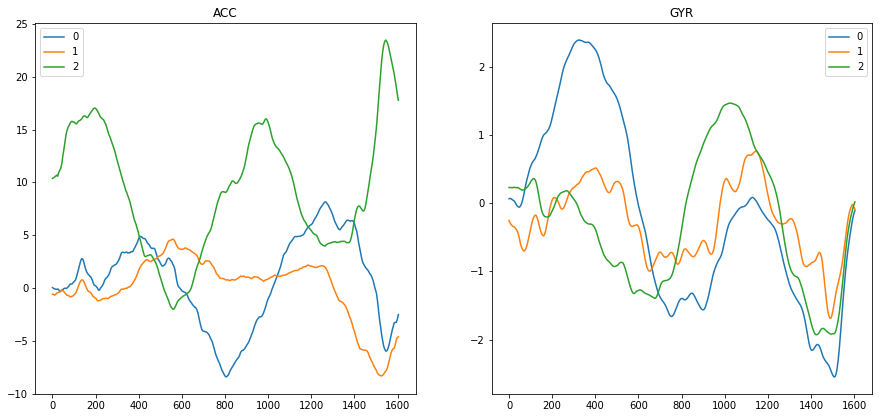

In [13]:
plot_all_readings(database_train.datalist[0].readings, table_format=(0, 2))